Doc link : https://docs.google.com/document/d/1IfOsvd3IZOMQTNN4y9tCdvD8QRpSMbfUt1QxDKJRXLM/edit?usp=sharing

In [2]:
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
image_path = "../../S2B_MSIL2A_20190612T044709_N0212_R076_T45RUL_20190612T085347.SAFE/GRANULE/L2A_T45RUL_A011828_20190612T045847/IMG_DATA/R10m/"

In [4]:
!ls ~/snap/pycharm-community/common/S2B_MSIL2A_20190612T044709_N0212_R076_T45RUL_20190612T085347.SAFE/GRANULE/L2A_T45RUL_A011828_20190612T045847/IMG_DATA/R20m

T45RUL_20190612T044709_AOT_20m.jp2  T45RUL_20190612T044709_B11_20m.jp2
T45RUL_20190612T044709_B02_20m.jp2  T45RUL_20190612T044709_B12_20m.jp2
T45RUL_20190612T044709_B03_20m.jp2  T45RUL_20190612T044709_B8A_20m.jp2
T45RUL_20190612T044709_B04_20m.jp2  T45RUL_20190612T044709_SCL_20m.jp2
T45RUL_20190612T044709_B05_20m.jp2  T45RUL_20190612T044709_TCI_20m.jp2
T45RUL_20190612T044709_B06_20m.jp2  T45RUL_20190612T044709_WVP_20m.jp2
T45RUL_20190612T044709_B07_20m.jp2


https://sentinel.esa.int/documents/247904/685211/Sentinel-2+Products+Specification+Document+%28PSD%29/0f7bedeb-9fbb-4b60-91aa-809162de456c
    
Combination of band for different Purpose

Natural Colors: 4 3 2
False color Infrared: 8 4 3
False color Urban: 12 11 4
Agriculture: 11 8 2
Atmospheric penetration: 12 11 8a
Healthy vegetation: 8 11 2
Land/Water: 8 11 4
Natural Colors with Atmospheric Removal: 12 8 3
Shortwave Infrared: 12 8 4
Vegetation Analysis: 11 8 4

![alt text](im.png "Title")

In [5]:
band2 = rasterio.open(image_path + "T45RUL_20190612T044709_B02_10m.jp2", driver="JP2OpenJPEG") #blue
band3 = rasterio.open(image_path + "T45RUL_20190612T044709_B03_10m.jp2", driver="JP2OpenJPEG") #green
band4 = rasterio.open(image_path + "T45RUL_20190612T044709_B04_10m.jp2", driver="JP2OpenJPEG") #red
band8 = rasterio.open(image_path + "T45RUL_20190612T044709_B08_10m.jp2", driver="JP2OpenJPEG") #red

In [6]:
band2.count

1

In [7]:
band2.shape , band8.shape , band2.block_shapes , band2.block_size, band2.dtypes

((10980, 10980),
 (10980, 10980),
 [(1024, 1024)],
 <function DatasetReader.block_size>,
 ('uint16',))

#### 16 bits of data per pixel

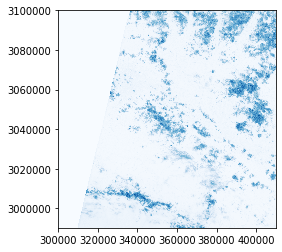

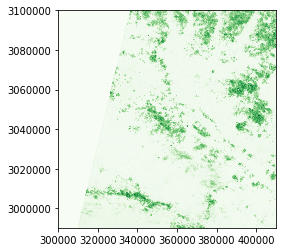

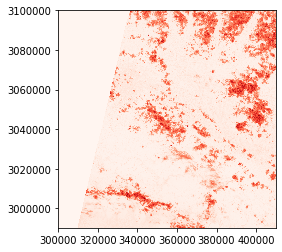

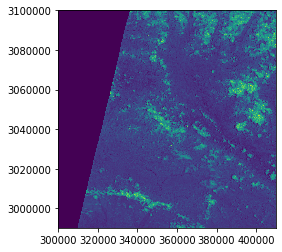

(<matplotlib.axes._subplots.AxesSubplot at 0x7f264bcf8438>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2679545ef0>)

In [8]:
plot.show(band2, cmap= "Blues"), plot.show(band3, cmap="Greens") , plot.show(band4, cmap = "Reds"), plot.show(band8)

In [10]:
trueColor = rasterio.open('SentinelTrueColor2.tiff','w',driver='Gtiff',
                         width=band4.width, height=band4.height,
                         count=3,
                         crs=band4.crs,
                         transform=band4.transform,
                         dtype=band4.dtypes[0]
                         )
trueColor.write(band2.read(1),3) #blue
trueColor.write(band3.read(1),2) #green
trueColor.write(band4.read(1),1) #red
trueColor.close()

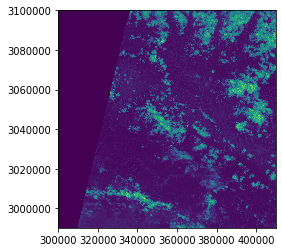

In [12]:
src = rasterio.open(r"SentinelTrueColor2.tiff", count=3)
plot.show(src)

# EarthPy

https://www.earthdatascience.org/courses/earth-analytics-python/multispectral-remote-sensing-in-python/landsat-bands-geotif-in-Python/

In [1]:
!pip3 install earthpy
import earthpy as et
import earthpy.spatial as es

  Using cached https://files.pythonhosted.org/packages/74/42/f4b147fc7920998a42046d0c2e65e61000bc5d104f1f8aec719612cb2fc8/geopandas-0.5.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/33/0d/0bcb0fdd759570e85697189f675fa462131e5636482f2832288bbe4bb6f7/Rtree-0.8.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a2/d6/f5dc5b31b5bbb8c9cf0ae2f38a31e4406994db48f9f14d9434588c935c7c/rasterio-1.0.24-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/ab/674e168bf7d0bc597218b3bec858d02c23fbac9ec1fec9cad878c6cee95f/scikit_image-0.15.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/da/83/d989ee20c78117c737ab40e0318ea221f1aed4e3f5a40b4f93541b369b93/matplotlib-3.1.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/87/2d/e4656149cbadd3a8a0369fcd1a9c7d61cc7b87b3903b85389c70c989a696/numpy-1.16.4-cp36-cp36m-manylinux1_x86_64.whl
  Us

OSError: Could not find libspatialindex_c library file

In [1]:
import earthpy as et
import earthpy.spatial as e

In [14]:
import earthpy.plot as ep

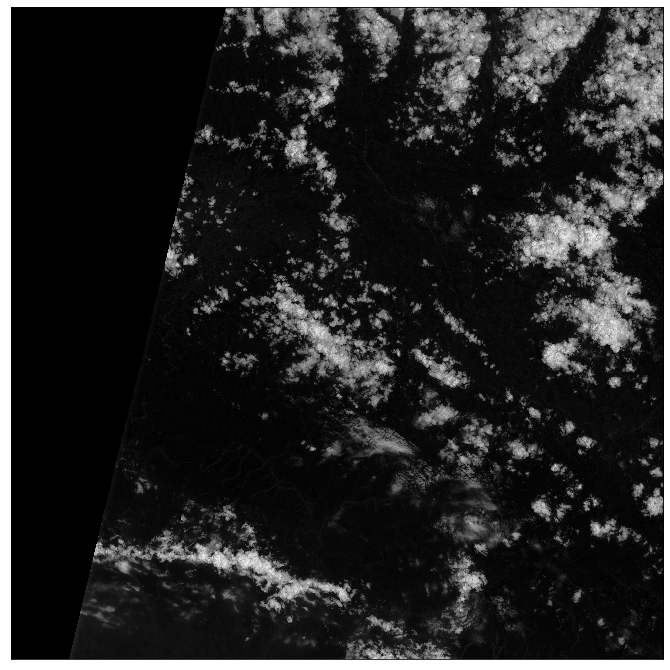

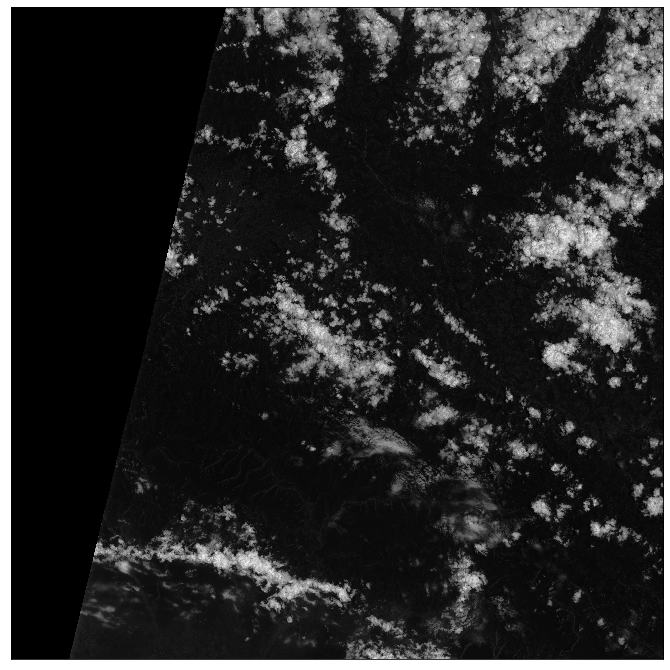

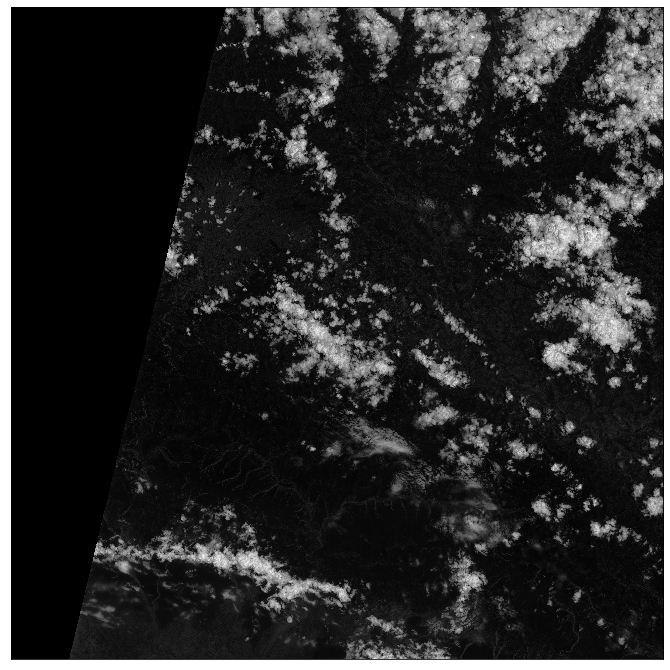

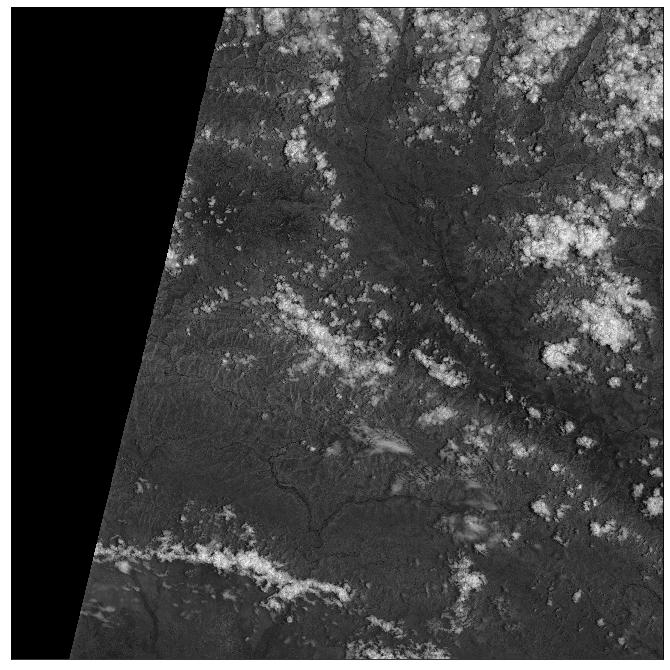

In [19]:
ep.plot_bands(band2.read(), cbar=False)
ep.plot_bands(band3.read(), cbar=False)
ep.plot_bands(band4.read(), cbar=False)
ep.plot_bands(band8.read(), cbar=False)
plt.show()

#### At a simple level, NDVI correlates with chlorophyll, which in turn correlates with plant health. Most space-based and terrestrial platforms that are used for agriculture, forestry, and similar applications have visual Red and NIR detector hardware, so NDVI has become a well-known, widely-used product. https://sentera.com/ndvi-vs-ndre-whats-difference/

In [23]:
NDVI = e.normalized_diff(band4.read(), band8.read())
ep.plot_bands(NDVI, cmap="RdYlGn")
plt.show()

MemoryError: 